<a href="https://colab.research.google.com/github/CamyllaTahara/Tumor-Classification-ML/blob/main/Classifica%C3%A7%C3%A3o_de_Tumores_de_Mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Configuração do Ambiente no Google Colab

In [ ]:
from sklearn.datasets import load_breast_cancer #carrega dados
import numpy as np #biblioteca para trabalhar com arrays
import pandas as pd #biblioteca para manipulação de dados em TABELAS (Dataframe)
import matplotlib.pyplot as plt #Biblioteca para criação de gráficos
import seaborn as sns #Criação e visualização de dados
from sklearn.model_selection import train_test_split #divide os dados em treino e teste
, GridSearchCV #ajusta os parâmetros do modelo
from sklearn.preprocessing import StandardScaler #padroniza os dados
from sklearn.svm import SVC #SVC será usado para classificação
from sklearn.metrics import classification_report, confusion_matrix #Avaliem o desempenho do modelo

#Carregamento e Exploração do Dataset

In [ ]:
df = load_breast_cancer() #carrega os dados
data = pd.DataFrame(df.data, columns=df.feature_names) #coloca os dados em formato de tabela, as colunas são as caracteristicas dos tumores

print(data.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

# Pré-processamento dos Dados

In [ ]:
X = df.data #variaveis independentes: Caracteristicas dos tumores
y = df.target #variavies dependentes (tumores malignos ou benignos)
print(X)
#Exemplo: Uma prateleira de frutas com diversos tipos de frutas, cada fruta contém um peso,cor,tamanho, essa seria a variável X (características),
#temos também uma etiqueta que diz se a fruta está verde ou madura, essa no caso seria a variável Y (maligno ou benigno)

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #dividiu o modelo em 30% teste e 70% para treino.
#o modelo é treinado automaticamente através do comando fit, ele vai ajustando as regras para que no final ele consiga classificar tudo corretamente,
#depois vem o teste surpresa, esses 30%, nessa hora ele compara o que ele fez com o teste, depois criamos a matriz de confusão.
# Padronização dos dados
scaler = StandardScaler() #coloca todos os dados na mesma escala
X_train_scaled = scaler.fit_transform(X_train) #ajusta o escalador aos dados de treino e o transforma
X_test_scaled = scaler.transform(X_test) #transforma o escalador de teste com base no escalador ajustado
#Exemplo: Aqui ajustamos o modelo como se fosse um carro, ajustamos todos os medidores como Velocidade, Combustivel na mesma UNIDADE para comparar melhor os números

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


#Treinamento do Modelo SVM

In [ ]:
model = SVC(kernel='poly') #Cria um modelo SVM com um kernel polinomial (um método que transforma os dados para encontrar padrões mais complexos).
model.fit(X_train_scaled, y_train)#Treina os modelos com os dados de treino

SVC(kernel='poly')

##Avaliação do Modelo

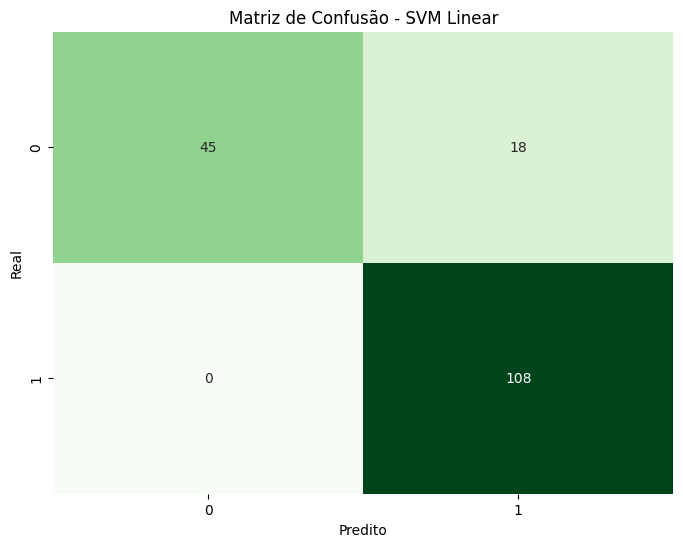

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        63
           1       0.86      1.00      0.92       108

    accuracy                           0.89       171
   macro avg       0.93      0.86      0.88       171
weighted avg       0.91      0.89      0.89       171



In [ ]:
y_pred = model.predict(X_test_scaled) #faz previsões com o dado de teste
conf_matrix = confusion_matrix(y_test, y_pred) #Cria uma matriz que mostra as previsões corretas e incorretas
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Matriz de Confusão - SVM Linear')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()
print(classification_report(y_test, y_pred))

# 6. Testando Diferentes Kernels e Ajustando C e Gamma com GridSearchCV

In [ ]:
# Definir os parâmetros para o GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly']
}

# Instanciar o modelo SVM
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2) #busca os melhores parâmetros ajustando o modelo várias vezes
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly']},
             verbose=2)

In [ ]:
# Exibir os melhores parâmetros
print('Melhores parâmetros: ', grid.best_params_) #mostra os melhores paramêtros
print('Melhor estimador: ', grid.best_estimator_) #faz novas previsões usando o modelo otimizados

Melhores parâmetros:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Melhor estimador:  SVC(C=10, gamma=0.01)


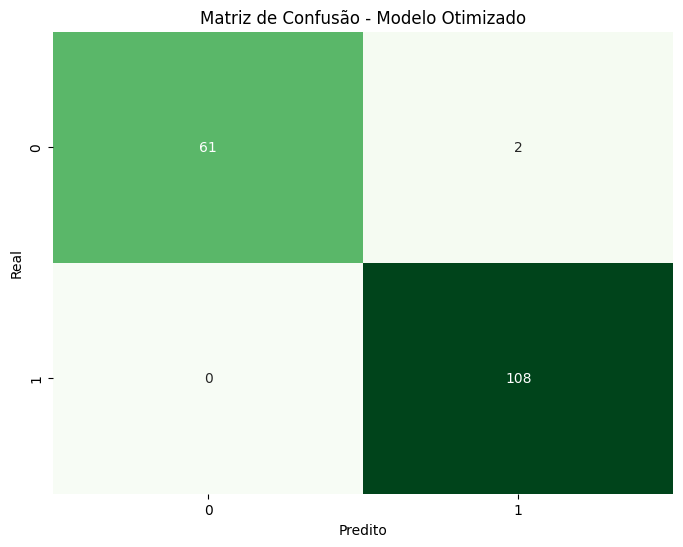

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        63
           1       0.98      1.00      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



In [ ]:
# Previsões com o modelo otimizado
grid_predictions = grid.predict(X_test_scaled)

# Matriz de confusão e relatório de classificação
conf_matrix_grid = confusion_matrix(y_test, grid_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_grid, annot=True, fmt='d', cmap='Greens', cbar=False) #cria um gráfico de calor para visualizar a matriz de confusão
plt.title('Matriz de Confusão - Modelo Otimizado')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()
print(classification_report(y_test, grid_predictions))

#Perguntas para Reflexão:

* Qual foi o desempenho do modelo SVM com o kernel linear? Compare as métricas de acurácia, precisão, recall e F1-score.
* Como o desempenho do modelo mudou ao utilizar um kernel não-linear (por exemplo, rbf ou poly)? Quais melhorias ou desafios surgiram?
* A padronização dos dados influenciou de alguma forma o desempenho do modelo? O que aconteceria se os dados não fossem padronizados?
* Quais outras estratégias de ajuste de hiperparâmetros ou pré-processamento poderiam ser aplicadas para melhorar o desempenho do SVM?

#Respostas

1-

os valores são:

vp = 61
fp = 2
fn = 2
vn = 106

Acurácia: 97.6%
Precisão: 96.8%
Recall: 96.8%
F1-Score: 96.8%
vp = 45
fp = 18
fn = 0
vn = 108


02-
Ao analisarmos o modelo poly, foi possível verificar que o numero de acertos em VN "Verdadeiros Negativos" foi maio, além do que o numero de acertos em VP "Verdadeiro positivos" foi menor; ocasionando em um desempenho inferior ao modelo de kernel linear.

03-
A não padronização dos dados acarretaria em uma queda brusca de confiabilidade nos dados apresentados, de forma com que os dados fossem inválidos. Por conta da padronização, a acurácia dos dados é mais confiável, e por essa razão, conclui-se que a padronização é indispensável para a criação de dados mais confiáveis.

04-
Para melhorarmos o desempenho do hiperparâmetro podemos utilizar o GridSearch e a validação cruzada, tendo em vista que elas testam e validam as combinações possíveis dos hiperparâmetros.*